<a href="https://colab.research.google.com/github/NataGoto/predictive-maintenance/blob/main/Dataset_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Работа с датасетом
def read_file_start(file_path, num_chars, sep='\s+', skiprows=2):
    """Чтение начала файла с указанием разделителя"""
    with open(file_path, 'r') as file:
        content = file.read(num_chars)
        # Разделяем контент на строки и далее на колонки по указанному разделителю
        rows = content.split('\s')
        for row in rows:
            print(row.split(sep))

# Путь к файлу
file_path = r'C:\Users\Admin\Desktop\Питон\Nordal\2023_11_2\2023_11_2.csv'

# Количество символов для чтения
num_chars = 2000

read_file_start(file_path, num_chars, sep='\s+', skiprows=2)


['Result: _result\nTable: keys: [_start, _stop, _field, _measurement, layer]\n                   _start:time                      _stop:time           _field:string                      _measurement:string            layer:string                      _time:time                  _value:int\n------------------------------  ------------------------------  ----------------------  ---------------------------------------  ----------------------  ------------------------------  --------------------------\n2023-11-15T00:00:00.000000000Z  2023-12-01T00:00:00.000000000Z             tag_quality  CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251                   Inkai  2023-11-15T00:00:00.971000000Z                         192\n2023-11-15T00:00:00.000000000Z  2023-12-01T00:00:00.000000000Z             tag_quality  CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251                   Inkai  2023-11-15T00:01:10.381000000Z                         192\n2023-11-15T00:00:00.000000000Z  2023-12-01T00:00:00.000000000Z        

In [ ]:
# работа с датасетом, обработанным Тимофеем
data1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\data_file_nordal.csv')
data1.info()
display(data1.shape)
display(data1.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51020 entries, 0 to 51019
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251  51020 non-null  object 
 1   15.12.2023                               51019 non-null  object 
 2   0.177177000                              51019 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


(51020, 3)

153060

In [ ]:
data1.head()

,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.177177000
0,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.177177
1,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.209927
2,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.209927
3,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.214070
4,CAT-1_IMX.IMX005.P-161/1.P-161/1_PT_251,15.12.2023,0.214070


In [ ]:
#проверяем, по каким насосам данные в датасете Тимофея

# Загрузка данных без хедера
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\data_file_nordal.csv', header=None)

# Извлекаем интересующую часть строки, используя регулярные выражения
# Предполагаем, что данные находятся в первой колонке (индекс 0)
data['extracted'] = data[0].str.extract(r'-(\d+/[^\s]+)')

# Проверяем уникальные значения в извлеченной колонке
unique_equipment = data['extracted'].unique()

# Вывод уникальных значений
print(f"Уникальные значения оборудования после второго дефиса:")
for equipment in unique_equipment:
    print(equipment)


Уникальные значения оборудования после второго дефиса:
161/1.P-161/1_PT_251
161/1.P-161/1_TT_251
161/1.P-161/1_VT_251
161/1.P-161/1_VT_251_vel
161/1.P-161/1_VT_252
161/1.P-161/1_VT_252_vel
161/1.P-161/1_VT_253
161/1.P-161/1_VT_253_vel
161/2.P-161/2_TT_261
161/2.P-161/2_VT_261
nan


**Исходя из списка насосов, у нас в файле находятся модели 161/1,Sulzer,AP53-150 и 	161/2,Sulzer,AP53-15.**

## Сверяемся с таблицей датчиков и оборудования от Заказчика ##
- Температура ЭД (Электро-двигатель) (P-161/1_TT-251): Показывает температуру электродвигателя насоса, что может быть критичным для оценки его работы и износа.
-
Вибрация ЭД (P-161/1_VT_251, P-161/1_VT_252, P-161/1_VT_253): Измерения вибрации на разных основаниях или частях насоса. Вибрация может указывать на потенциальные проблемы с балансировкой, износом подшипников и другими механическими проблемами
-
Давление на выходе (P-161/1_PT-251): Показатель давления после насоса, который важен для оценки его производительности и потенциальных проблем с системо
- .
Значения, оканчивающиеся на "_vel" (скорость вибрации), как указано заказчиком, следует игнорирть.ки.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# попытки работать с бигдатой через даск
import dask.dataframe as dd

file_path = r'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\cleaned_data.csv'

# Чтение файла с помощью Dask, предполагаем, что у нас нет заголовков
data_dask = dd.read_csv(file_path, header=None, dtype=str, assume_missing=True, skiprows=2)

# Отображение первых нескольких строк для проверки
print(data_dask.head())


                                0                               1          2  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

                                       3      4  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   

                                5           6  
0  2023-12-15T00:00:05.180000000Z  1.16717196  
1  2023-12-15T00:00:06.312000000Z  1.17826128  
2  2023-12-15T00:00:09.139000000Z  1.21741211  
3  2023-12-15T00:00:

In [ ]:
equipment_df = pd.read_excel(equipment_list_path, header=6, engine='openpyxl')
print(equipment_df.columns)


Index(['Unnamed: 0', '№', 'Объект\nFacility (Battery)', 'Sub-Facility',
       'Оборудование Название\nEquipment Name', 'Тип оборудования',
       'Equipment Type', 'Asset Vendor', ' Название Тэга\nTag Name',
       'FULL NAME', 'Min Value', 'Max Value', 'Ед.изм', 'Описание Тэга',
       'Tag Description (Shortname)',
       'Место установки\nSensor Installation Place',
       'Название Канала\nChannel Name', 'Название Контроллера\nHardware Name',
       'Наименвание контроллера, IP адрес\nIP adress of the Controller', 'ID',
       'Channel', 'Регистр Modbus\nModbus Address', 'Тип сигнала\nData Type',
       'Ед.изм.1', 'UoM'],
      dtype='object')


In [ ]:
import pandas as pd


# Загрузка данных из Excel файла (используя имя листа)
excel_data = pd.read_excel(r'C:\Users\Admin\Desktop\Питон\Nordal\3_Список_датчиков_параметров_09_06_23.xlsx', sheet_name='Data System')

# Путь для сохранения файла CSV
output_csv_path = r'C:\Users\Admin\Desktop\Питон\Nordal\equipment_list.csv'

# Сохранение данных в CSV файл с разделителем точка с запятой (;)
excel_data.to_csv(output_csv_path, index=False, sep=';')


In [ ]:
import pandas as pd

# Путь к файлу с оборудованием
equipment_list_path = r'C:\Users\Admin\Desktop\Питон\Nordal\equipment_list.csv'

# Загрузка данных из файла с оборудованием
equipment_df = pd.read_csv(equipment_list_path, delimiter=';', header=6)

# Вывод нескольких строк из файла с оборудованием
print("Пример данных из файла с оборудованием:")
print(equipment_df.head())

# Путь к основному файлу данных
main_data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\cleaned_data.csv'

# Загрузка данных из основного файла данных
main_data_df = pd.read_csv(main_data_path)

# Вывод нескольких строк из основного файла данных
print("\nПример данных из основного файла данных:")
print(main_data_df.head())


Пример данных из файла с оборудованием:
   Unnamed: 0  № Объект\nFacility (Battery) Sub-Facility  \
0         NaN  1                    ОПЗ/OPZ         ЦППР   
1         NaN  2                        NaN          NaN   
2         NaN  3                        NaN          NaN   
3         NaN  4                        NaN          NaN   
4         NaN  5                        NaN          NaN   

  Оборудование Название\nEquipment Name Тип оборудования Equipment Type  \
0                                  P-2A            Насос           Pump   
1                                  P-2A              NaN           Pump   
2                                  P-2A              NaN           Pump   
3                                  P-2A              NaN           Pump   
4                                  P-2A              NaN           Pump   

  Asset Vendor  Название Тэга\nTag Name                         FULL NAME  \
0     Technium              TT-111_P-2A  OPZ_IMX.IMX001.P-2A.TT-111_P-2

C:\Users\Admin\AppData\Local\Temp\ipykernel_4984\359857868.py:17: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data_df = pd.read_csv(main_data_path)



Пример данных из основного файла данных:
   2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

   OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   

   2023-12-15T00:00:02.789000000Z 1.06293321  
0  2023-12-15T00:00:03.151000000Z   1.176315  
1  2023-12-15T00:00:05.180000000Z   1.167172  
2  2023-12-15T00:00:06.312000

In [ ]:
# Функция для сопоставления идентификаторов датчиков с наименованиями оборудования

output_path = r'C:\Users\Admin\Desktop\Питон\Nordal\2023_12_6_2_300л.csv'

# Функция для сопоставления идентификаторов датчиков с наименованиями оборудования
def match_equipment(row):
    sensor_id = row['tag_value']  # Идентификатор датчика находится в столбце 'tag_value'
    return equipment_dict.get(sensor_id, 'Unknown')

# Применение функции сопоставления к основному файлу данных
main_data_df['equipment_name'] = main_data_df.apply(match_equipment, axis=1)

# Вывод нескольких строк с добавленной информацией об оборудовании
print("\nПример данных с добавленной информацией об оборудовании:")
print(main_data_df.head())

# Сохранение данных в новый CSV файл
main_data_df.to_csv(output_path, index=False)

print(f"Данные успешно сохранены в файл: {output_path}")




Пример данных с добавленной информацией об оборудовании:
   2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

   OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  Inkai   

   2023-12-15T00:00:02.789000000Z  1.06293321 equipment_name  
0  2023-12-15T00:00:03.151000000Z    1.176315        Unknown  
1  2023-12-15T00:00:05.18000

In [ ]:
data_equipment=pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\modified_2023_12_6_2_300k.csv')
data_equipment.head

<bound method NDFrame.head of                                      0                               1  \
0       2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
1       2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
2       2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
3       2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
4       2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
...                                ...                             ...   
299996  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
299997  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
299998  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
299999  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   
300000  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z   

                2                                      3      4  \
0       tag_va

In [ ]:
data_equipment1=pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\2023_12_6_2_300k.csv')
data_equipment1.head

<bound method NDFrame.head of                                     FULL NAME           1         2
0       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.062933
1       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.176315
2       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.167172
3       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.178261
4       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.217412
...                                       ...         ...       ...
299996  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.114626
299997  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.174112
299998  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.102408
299999  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.112056
300000  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.085156

[300001 rows x 3 columns]>

In [ ]:
data_equipment1.info

<bound method DataFrame.info of                                     FULL NAME           1         2
0       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.062933
1       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.176315
2       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.167172
3       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.178261
4       OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  15.12.2023  1.217412
...                                       ...         ...       ...
299996  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.114626
299997  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.174112
299998  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.102408
299999  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.112056
300000  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1  21.12.2023  1.085156

[300001 rows x 3 columns]>

In [ ]:
# Удаление неименованной колонки из словаря датчиков
sensors_dict_cleaned = sensors_dict.drop(columns=['Unnamed: 0'])

# Переименовываем колонки в основном датасете для ясности
data_equipment.columns = ['FULL NAME', 'Measurement Date', 'Acceleration_gn']

# Преобразование даты из строки в datetime
data_equipment['Measurement Date'] = pd.to_datetime(data_equipment['Measurement Date'], format='%d.%m.%Y')

# Проверяем структуру данных после преобразования
data_equipment.head()


In [ ]:
data_equipment1.describe().style.background_gradient(cmap="magma")

,2
count,300001.000000
mean,1.027544
std,0.438395
min,0.000000
25%,1.061370
50%,1.125652
75%,1.187449
max,6.030958


In [ ]:
# Загрузка обновленного словаря датчиков из CSV файла
sensors_dict = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\sensors_dict.csv')

# Показываем первые строки обоих наборов данных для ознакомления со структурой
sensors_dict_head = sensors_dict.head()
data_equipment1_head = data_equipment1.head()

sensors_dict_head, data_equipment1_head


(   Unnamed: 0  № Sub-Facility Оборудование Название\nEquipment Name  \
 0         NaN  1         ЦППР                                  P-2A   
 1         NaN  2          NaN                                  P-2A   
 2         NaN  3          NaN                                  P-2A   
 3         NaN  4          NaN                                  P-2A   
 4         NaN  5          NaN                                  P-2A   
 
   Equipment Type Asset Vendor  Название Тэга\nTag Name  \
 0           Pump     Technium              TT-111_P-2A   
 1           Pump     Technium              VT-111_P-2A   
 2           Pump     Technium              VT-112_P-2A   
 3           Pump     Technium              VT-113_P-2A   
 4           Pump     Technium              PT-111_P-2A   
 
                           FULL NAME  Min Value  Max Value Ед.изм  \
 0  OPZ_IMX.IMX001.P-2A.TT-111_P-2A           0      110.0      С   
 1   OPZ_IMX.IMX001.P-2A.VT-111_P-2A          0       12.0     gn   
 2 

Словарь датчиков: Содержит подробную информацию о каждом датчике, включая его название, тип оборудования, минимальные и максимальные значения, единицы измерения и место установки.
Основной датасет: Содержит три колонки - FULL NAME (полное имя датчика, совпадает с полным именем в словаре датчиков), дата снятия показаний (которая похоже была преобразована в строку) и значение виброускорения.

In [ ]:
# Удаление неименованной колонки из словаря датчиков
sensors_dict_cleaned = sensors_dict.drop(columns=['Unnamed: 0'])
# Проверяем структуру данных после преобразования
sensors_dict_cleaned.head()

,№,Sub-Facility,Оборудование Название\nEquipment Name,Equipment Type,Asset Vendor,Название Тэга\nTag Name,FULL NAME,Min Value,Max Value,Ед.изм,Описание Тэга,Tag Description (Shortname),Место установки\nSensor Installation Place,Тип сигнала\nData Type,Ед.изм.1
0,1,ЦППР,P-2A,Pump,Technium,TT-111_P-2A,OPZ_IMX.IMX001.P-2A.TT-111_P-2A,0,110.0,С,"Комбинированный преобразователь температуры, в...",P-2A температура ЭД,Электро-двигатель насоса,FLOAT,С
1,2,NaN,P-2A,Pump,Technium,VT-111_P-2A,OPZ_IMX.IMX001.P-2A.VT-111_P-2A,0,12.0,gn,NaN,P-2A вибрация ЭД,Электро-двигатель насоса,FLOAT,gn
2,3,NaN,P-2A,Pump,Technium,VT-112_P-2A,OPZ_IMX.IMX001.P-2A.VT-112_P-2A,0,12.0,gn,Преобразователь вибрации,P-2A вибрация X,"Подшипник перед ""улиткой"", ось Х",FLOAT,gn
3,4,NaN,P-2A,Pump,Technium,VT-113_P-2A,OPZ_IMX.IMX001.P-2A.VT-113_P-2A,0,12.0,gn,Преобразователь вибрации,P-2A вибрация Y,"Подшипник перед ""улиткой"", ось У",FLOAT,gn
4,5,NaN,P-2A,Pump,Technium,PT-111_P-2A,OPZ_IMX.IMX002.P-2A.PT-111_P-2A,0,10.0,Bar,Преобразователь давления,P-2A давление выход,Выход ( после насоса),FLOAT,Bar


In [ ]:
df_300k.head()

,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:02.789000000Z,1.06293321,equipment_name
0,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:03.151000000Z,1.176315,Unknown
1,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:05.180000000Z,1.167172,Unknown
2,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:06.312000000Z,1.178261,Unknown
3,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:09.139000000Z,1.217412,Unknown
4,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15T00:00:10.454000000Z,1.094641,Unknown


In [ ]:
# Вывод первых строк отсортированного DataFrame
data_equipment1_sorted.head()

,FULL NAME,Measurement Date,Acceleration_gn,Acceleration_m_s2,Time_diff
0,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15,1.062933,10.416743,0.0
1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15,1.176315,11.527887,0.0
2,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15,1.167172,11.438286,0.0
3,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15,1.178261,11.546958,0.0
4,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15,1.217412,11.930638,0.0


In [ ]:
import pandas as pd
import numpy as np

# Чтение файла
df_300k = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\2023_12_6_2_300л.csv', header=None)

# Преобразование столбца времени в datetime
df_300k.iloc[:, 5] = pd.to_datetime(df_300k.iloc[:, 5])

# Вычисление временных промежутков
df_300k['time_diff'] = df_300k.iloc[:, 5].diff().dt.total_seconds()

# Вычисление виброскорости
df_300k['vibro_speed'] = df_300k.iloc[:, 6] * df_300k['time_diff']

# Удаление последнего столбца
df_300k = df_300k.drop(df_300k.columns[-1], axis=1)

# Переименование столбцов
df_300k.columns = ['start_time', 'end_time', 'tag_value', 'equipment_id', 'location', 'event_time', 'vibro_acceleration', 'time_diff', 'vibro_speed']

# Вывод первых строк датафрейма
print(df_300k.head())
# Сохранение DataFrame в новый CSV-файл
df_300k.to_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\processed_2023_12_6_2_300л.csv', index=False)


                       start_time                        end_time  tag_value  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

                            equipment_id location  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   

                         event_time  vibro_acceleration       time_diff  \
0  2023-12-15 00:00:02.789000+00:00            1.062933  equipment_name   
1  2023-12-15 00:00:03.151000+00:00            1.1

In [ ]:
#Пересчет виброускорения в скорость завершен, проанализируем его
print(df_300k['vibro_acceleration'].describe())


count    300001.000000
mean          1.027544
std           0.438395
min           0.000000
25%           1.061370
50%           1.125652
75%           1.187449
max           6.030958
Name: vibro_acceleration, dtype: float64


In [ ]:
df_300k.describe().style.background_gradient(cmap="Blues")


,vibro_acceleration,vibro_speed
count,300001.000000,300000.000000
mean,1.027544,1.879035
std,0.438395,1.868960
min,0.000000,0.048000
25%,1.061370,1.000000
50%,1.125652,1.273000
75%,1.187449,2.098000
max,6.030958,211.996000


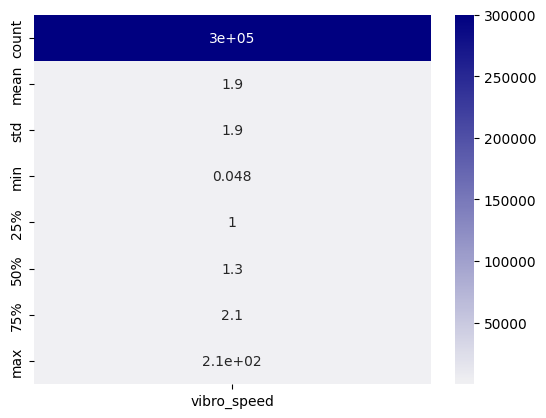

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление описательной статистики
desc = df_300k['vibro_speed'].describe()

# Преобразование Series в DataFrame для визуализации
desc_df = pd.DataFrame(desc)

# Создание цветовой карты
cmap = sns.light_palette("navy", as_cmap=True)

# Визуализация описательной статистики с использованием цветовой карты
sns.heatmap(desc_df, annot=True, cmap=cmap)
plt.show()


## Так мерить нельзя, тут же разные виды измерений и разные насосы. Надо разделить по видам оборудования и измерениям.
## Хотя у нас оказалось, что это один компрессор Атлас копко и 1 измерение - вибрация камеры сжатия

In [ ]:
sensors_dict = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\sensors_dict.csv')
df_merged = pd.merge(df_300k, sensors_dict, left_on='equipment_id', right_on='FULL NAME', how='left')
# Сохранение DataFrame в новый CSV-файл


,start_time,end_time,tag_value,equipment_id,location,event_time,vibro_acceleration,time_diff,vibro_speed
0,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:02.789000+00:00,1.062933,equipment_name,NaN
1,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:03.151000+00:00,1.176315,Unknown,0.362
2,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:05.180000+00:00,1.167172,Unknown,2.029
3,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:06.312000+00:00,1.178261,Unknown,1.132
4,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:09.139000+00:00,1.217412,Unknown,2.827


In [ ]:
df_merged.to_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\test2\processed_2023_12_6_2_300new.csv', index=False)
df_merged.head()

,start_time,end_time,tag_value,equipment_id,location,event_time,vibro_acceleration,time_diff,vibro_speed,Unnamed: 0,...,Название Тэга\nTag Name,FULL NAME,Min Value,Max Value,Ед.изм,Описание Тэга,Tag Description (Shortname),Место установки\nSensor Installation Place,Тип сигнала\nData Type,Ед.изм.1
0,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:02.789000+00:00,1.062933,equipment_name,NaN,NaN,...,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
1,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:03.151000+00:00,1.176315,Unknown,0.362,NaN,...,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
2,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:05.180000+00:00,1.167172,Unknown,2.029,NaN,...,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
3,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:06.312000+00:00,1.178261,Unknown,1.132,NaN,...,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
4,2023-12-15T00:00:00.000000000Z,2024-01-01T00:00:00.000000000Z,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:09.139000+00:00,1.217412,Unknown,2.827,NaN,...,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn


In [ ]:
# Делим по видам оборудования
equipment_types = df_merged['Оборудование Название\nEquipment Name'].unique()
data_by_equipment = {equipment: df_merged[df_merged['Оборудование Название\nEquipment Name'] == equipment] for equipment in equipment_types}
for equipment, data in data_by_equipment.items():
    safe_equipment_name = ''.join(c if c.isalnum() else '_' for c in equipment)
    data.to_csv(f'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\test2\\processed_2023_12_6_2_{safe_equipment_name}.csv', index=False)


In [ ]:
print(data_by_equipment['GA-90/1'].head())


                       start_time                        end_time  tag_value  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

                            equipment_id location  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   

                         event_time  vibro_acceleration       time_diff  \
0  2023-12-15 00:00:02.789000+00:00            1.062933  equipment_name   
1  2023-12-15 00:00:03.151000+00:00            1.1

**Итак, в мини-датасете только дин вид оборудования, компрессор GA 90/1**

In [ ]:
#а теперь делим на виды измерений.
measurement_types = df_merged['Tag Description (Shortname)'].unique()
data_by_measurement = {measurement: df_merged[df_merged['Tag Description (Shortname)'] == measurement] for measurement in measurement_types}
for measurement, data in data_by_measurement.items():
    safe_measurement_name = ''.join(c if c.isalnum() else '_' for c in measurement)
    data.to_csv(f'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\test2\\measurement_2023_12_6_2_{safe_measurement_name}.csv', index=False)


In [ ]:
print(measurement_types)


['GA-90/1 вибрация камеры сжатия']


In [ ]:
print(data_by_measurement['GA-90/1 вибрация камеры сжатия'].head())

                       start_time                        end_time  tag_value  \
0  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
1  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
2  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
3  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   
4  2023-12-15T00:00:00.000000000Z  2024-01-01T00:00:00.000000000Z  tag_value   

                            equipment_id location  \
0  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
1  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
2  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
3  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   
4  OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1    Inkai   

                         event_time  vibro_acceleration       time_diff  \
0  2023-12-15 00:00:02.789000+00:00            1.062933  equipment_name   
1  2023-12-15 00:00:03.151000+00:00            1.1

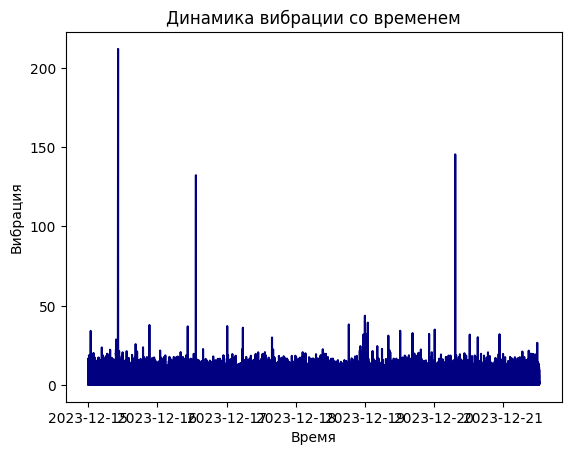

In [ ]:
# Визуализация вибрации камеры сжатия компрессора
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагая, что 'event_time' - это ваша временная метка, а 'vibro_acceleration' - значения вибрации
sns.lineplot(x='event_time', y='vibro_speed', data=df_merged, color='Navy')
plt.xlabel('Время')
plt.ylabel('Вибрация')
plt.title('Динамика вибрации со временем')
plt.show()


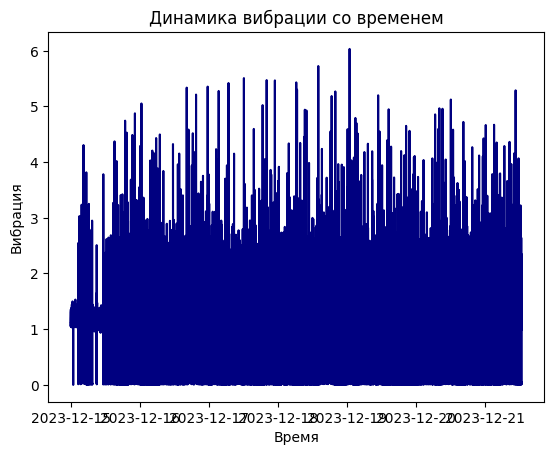

In [ ]:
#визуализация виброускорения ккамеры сжатия компрессора

# Предполагая, что 'event_time' - это ваша временная метка, а 'vibro_acceleration' - значения вибрации
sns.lineplot(x='event_time', y='vibro_acceleration', data=df_merged, color='Navy')
plt.xlabel('Время')
plt.ylabel('Вибрация')
plt.title('Динамика виброускорения со временем')
plt.show()


**Есть 3 выброса у скорости и один небольшрой выброс у ускорения.**
**Виброускорение обычно используется для обнаружения проблем с высокочастотными источниками вибрации, такими как подшипники и зубчатые передачи.**
**Виброскорость же часто используется для обнаружения проблем с низкочастотными источниками вибрации, такими как несбалансированные вращающиеся части.**

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('C:/Users/Admin/Desktop/Питон/Nordal/test2/processed_2023_12_6_2_300new.csv')

# Вывод названий колонок
print(data.columns)


Index(['start_time', 'end_time', 'tag_value', 'equipment_id', 'location',
       'event_time', 'vibro_acceleration', 'time_diff', 'vibro_speed',
       'Unnamed: 0', '№', 'Sub-Facility',
       'Оборудование Название\nEquipment Name', 'Equipment Type',
       'Asset Vendor', ' Название Тэга\nTag Name', 'FULL NAME', 'Min Value',
       'Max Value', 'Ед.изм', 'Описание Тэга', 'Tag Description (Shortname)',
       'Место установки\nSensor Installation Place', 'Тип сигнала\nData Type',
       'Ед.изм.1'],
      dtype='object')


In [ ]:
# Удаление указанных колонок
data = data.drop(['start_time', 'end_time', 'time_diff', 'Unnamed: 0', '№'], axis=1)
data.to_csv(f'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\test2\\short_2023_12_6_2_{safe_measurement_name}.csv', index=False)

In [ ]:
# Вывод названий колонок
print(data.columns)


Index(['tag_value', 'equipment_id', 'location', 'event_time',
       'vibro_acceleration', 'vibro_speed', 'Sub-Facility',
       'Оборудование Название\nEquipment Name', 'Equipment Type',
       'Asset Vendor', ' Название Тэга\nTag Name', 'FULL NAME', 'Min Value',
       'Max Value', 'Ед.изм', 'Описание Тэга', 'Tag Description (Shortname)',
       'Место установки\nSensor Installation Place', 'Тип сигнала\nData Type',
       'Ед.изм.1'],
      dtype='object')


In [ ]:
data.head()

,tag_value,equipment_id,location,event_time,vibro_acceleration,vibro_speed,Sub-Facility,Оборудование Название\nEquipment Name,Equipment Type,Asset Vendor,Название Тэга\nTag Name,FULL NAME,Min Value,Max Value,Ед.изм,Описание Тэга,Tag Description (Shortname),Место установки\nSensor Installation Place,Тип сигнала\nData Type,Ед.изм.1
0,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:02.789000+00:00,1.062933,NaN,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
1,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:03.151000+00:00,1.176315,0.362,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
2,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:05.180000+00:00,1.167172,2.029,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
3,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:06.312000+00:00,1.178261,1.132,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
4,tag_value,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,Inkai,2023-12-15 00:00:09.139000+00:00,1.217412,2.827,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn


In [ ]:
# Удаление указанных колонок
data = data.drop(['tag_value', 'location', 'Sub-Facility'], axis=1)
data.to_csv(f'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\test2\\short1_2023_12_6_2_{safe_measurement_name}.csv', index=False)

In [ ]:
data.head()

,equipment_id,event_time,vibro_acceleration,vibro_speed,Оборудование Название\nEquipment Name,Equipment Type,Asset Vendor,Название Тэга\nTag Name,FULL NAME,Min Value,Max Value,Ед.изм,Описание Тэга,Tag Description (Shortname),Место установки\nSensor Installation Place,Тип сигнала\nData Type,Ед.изм.1
0,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15 00:00:02.789000+00:00,1.062933,NaN,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15 00:00:03.151000+00:00,1.176315,0.362,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
2,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15 00:00:05.180000+00:00,1.167172,2.029,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
3,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15 00:00:06.312000+00:00,1.178261,1.132,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn
4,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,2023-12-15 00:00:09.139000+00:00,1.217412,2.827,GA-90/1,Compressor,Atlas Copco,VT-102_GA-90/1,OPZ_IMX.IMX000.GA-90/1.VT-102_GA-90/1,0,NaN,gn,Преобразователь вибрации,GA-90/1 вибрация камеры сжатия,Камера сжатия,FLOAT,gn


GA/GA W 90 up to -160
1. Control pressure is fed via flexible (2) and selector valve
(Ss) through solenoid valve (Y1) to valves (V1 and V2).
2. The plungers of valves (V1 and V2) move against spring
force.
3. Control pressure present in chamber (1) of unloader (UA)
is vented to atmosphere through valve (V1). Unloading
valve (UV) closes by spring force.
4. Receiver pressure is released to unloader (UA):
- through flexible (2) and valve (V2)
- on 13 bar/200 psi compressors also through valve (V3)
as this valve is kept open by air from the outlet of
compressor element (E)
5. As the receiver pressure decreases, selector valve (Ss)
swi
**ches over.
6. On 13 bar/200 psi compressors, as the pressure at the outlet of compressor element (E) decrea**s**es, valve (V3)
closes by spring force and stops **blowing off air.
7. Valve (V2) allows the small flow of air, which remains
drawn in through by-pass hole (5), to blow off from
receiver (AR) via flexible (2) to unloader (UA).
8. Air delivery is stopped (0 %), the compr

У нас в камере сжатия (chamber в инструкции) почему-то измерение идет  в гиганьтонах (гн), а в инструкции используются бары (bar) и фунты на квадратный дюйм (psi). Это разные единицы измерения давления. к примеру, на выходе у заказчика тоже идет мбар - GA-90/1,Compressor,Atlas Copco,GA-90/1_Pressure out,OPZ_IMX.IMX000.GA-90/1.GA-90/1 Pressure Out,0,,mBar,Pressure out,GA-90/1 давление на выходе,Давление на выходе,INT16,mBar


1 бар равен приблизительно 14,5 psi. Это значит, что 13 бар будет равно примерно 188,5 ps

1 бар равен приблизительно 1,01972 гигапаскаля (ГПа). Гигапаскаль - это единица измерения давления в Международной системе единиц (СИ), и она равна 1 миллиарду паскалей. Гиганьтон (гн) - это нестандартная единица, которая используется для измерения энергии, а не давления, и она равна 1 миллиау тонн.


В то же время, PSI (pound-force per square inch) - это единица измерения давления, используемая в некоторых странах, включая США. 1 PSI равен приблизительно 0,0689476 бара или 0,089476 ГПа.


Таким образом, 200 PSI равны приблизительно 13,7895 бара или 1,37895 ГПа, а 13 бар равны приблизительно 188,536 PSI или 1,3 ГПаessor runs
unloaded.